# TP Clustering

## Imports

In [1]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
from time import time
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN

### Lire 3 jeux de données différents :

In [2]:
'''
engy = arff.loadarff(open('datasets/engytime.arff'))
engy = np.array(engy[0])
disk = arff.loadarff(open('datasets/disk-4600n.arff'))
disk = np.array(disk[0])
'''
diamond = arff.loadarff(open('datasets/diamond9.arff'))
diamond = np.array(diamond[0])
banana = arff.loadarff(open('datasets/banana.arff'))
banana = np.array(banana[0])
elly = arff.loadarff(open('datasets/2d-4c-no4.arff'))
elly = np.array(elly[0])

Affichage des données :

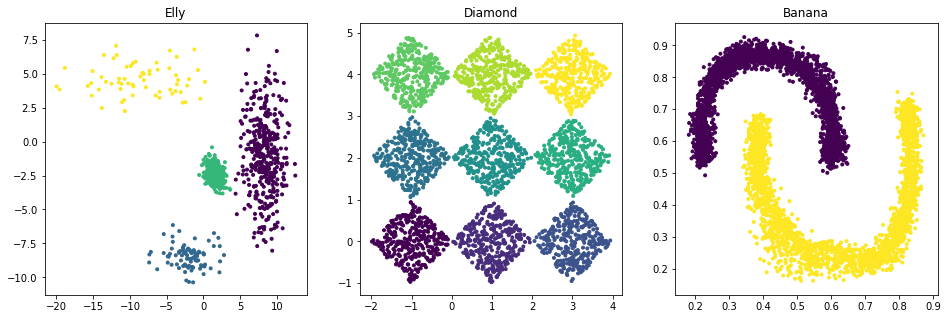

In [3]:
plt.figure(figsize = (16,5))

plt.subplot(1,3,1)
plt.title("Elly")
plt.scatter(elly['x'],elly['y'],c=elly['class'],marker='.')

plt.subplot(1,3,2)
plt.title("Diamond")
plt.scatter(diamond['x'],diamond['y'],c=diamond['class'], marker='.')

plt.subplot(1,3,3)
plt.title("Banana")
plt.scatter(banana['x'],banana['y'],c=banana['class'], marker='.')

'''
plt.subplot(2,3,4)
plt.title("Disk")
plt.scatter(disk['x'],disk['y'], c=disk['class'], marker='.')

plt.subplot(2,3,5)
plt.title("Elly")
plt.scatter(elly['x'],elly['y'],c=elly['class'],marker='.')
'''

plt.show()

**Engy : Deux clusters légèrement superposés et convexes<br>
Diamond : Neuf clusters bien séparés et convexes<br>
Banana : Deux clusters bien séparés et non convexes<br>**

Outils

In [9]:
def nb_labels(labels):
    diff_labels = []
    for i in range(len(labels)):
        if not labels[i] in diff_labels:
            diff_labels.append(labels[i])
    return len(diff_labels)

def create_train_set(sample):
    data = []
    #Construction de data
    for i in range(0,len(sample)):
        data.append((sample[i][0], sample[i][1]))
    return data

def test_model(model, data, lines, column, index, param, param_value):
    scoreSilhouette = -1
    scoreDB = -1
    scoreCH = -1
        
    t0 = time()
    labels = model.fit_predict(data)
    t = time() - t0
    nbLabels = nb_labels(labels)
    if nbLabels > 1:
        #Calcul des métriques
        scoreDB = metrics.davies_bouldin_score(data, labels)
        scoreSilhouette = metrics.silhouette_score(data, labels)
        scoreCH = metrics.calinski_harabasz_score(data,labels)
        
    #Affichage des clusters
    plt.subplot(lines,column,index)
    plt.scatter(sample["x"],sample["y"],c=labels,marker='.')
    plt.title(f"{param}={param_value} | Clusters:{nb_labels(labels)}")
    
    return t, scoreDB, scoreCH, scoreSilhouette

def print_metrics(methode, parametre, abcisse, times, scoresDB, scoresSilhouette, scoresCH):
    plt.figure(figsize = (16,5))
    
    plt.subplot(1,2,1)
    plt.plot(indexes,times,marker = 'o', color='purple')
    plt.title(f"Temps d'exécution de {methode} en fonction du paramètre {parametre}")
    
    plt.subplot(1,2,2)
    plt.plot(indexes,scoresDB,marker = 'o', color='green', label="Davies-Bouldin")
    plt.plot(indexes,scoresSilhouette, marker = 'o', color='red', label="Silhouette")
    plt.title(f"Scores en fonction du paramètre {parametre}")
    plt.legend()
    plt.show()

## I - KMEANS

Evaluation de kmeans à partir de 3 métriques différentes :

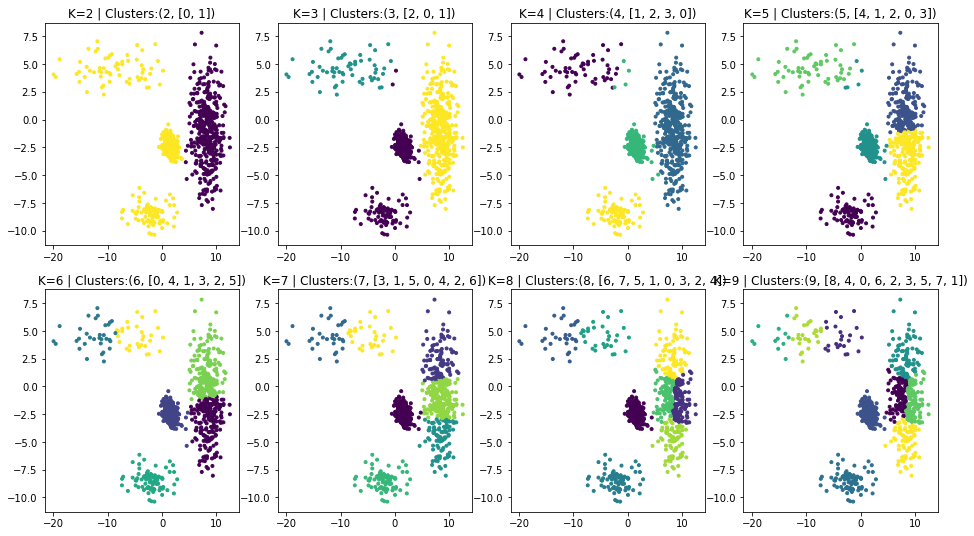

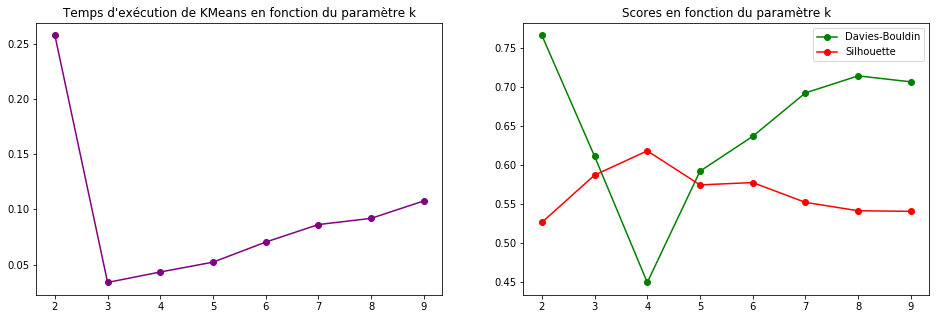

In [8]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,10)
sample = elly
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = KMeans(n_clusters=i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 4, j, "K", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("KMeans", "k", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**On constate que, comme on pouvait s'y attendre, le meilleur score est atteint pour k=4 (il s'agit du véritable nombre de clusters pour elly), on note cependant des petites erreurs liées au bruit. Le temps semble proportionnel à la valeur de k.**

*Nous allons mainteant réessayer avec des clusters plus réguliers :*

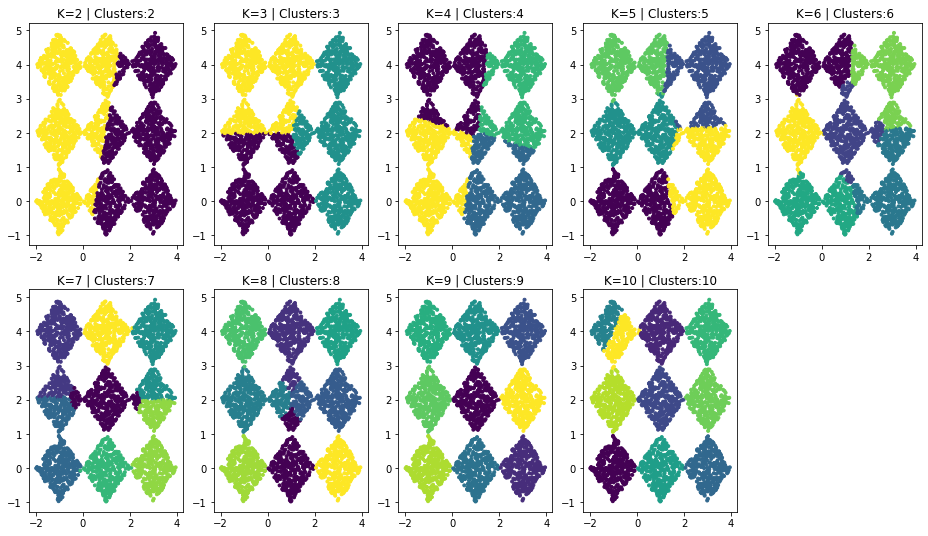

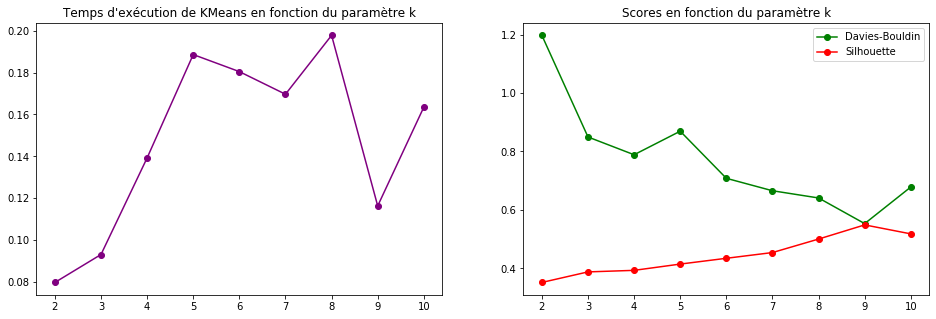

In [6]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,11)
sample = diamond
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = KMeans(n_clusters=i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 5, j, "K", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("KMeans", "k", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**On trouve bien que 9 est le nombre de clusters le plus adapté, de plus, contrairement à elly, cette fois il ne semble pas y avoir d'erreur sur la répartition des points. Cette différence peut s'expliquer par le fait que sur l'échantillon diamond, les neuf clusters sont bien séparés et de formes homogènes, contrairement à ceux de l'échantillon elly, qui sont plus allongés, irréguliers et épars.**

On va continuer les expérimentations en prenant maintenant un échantillon non convexe :

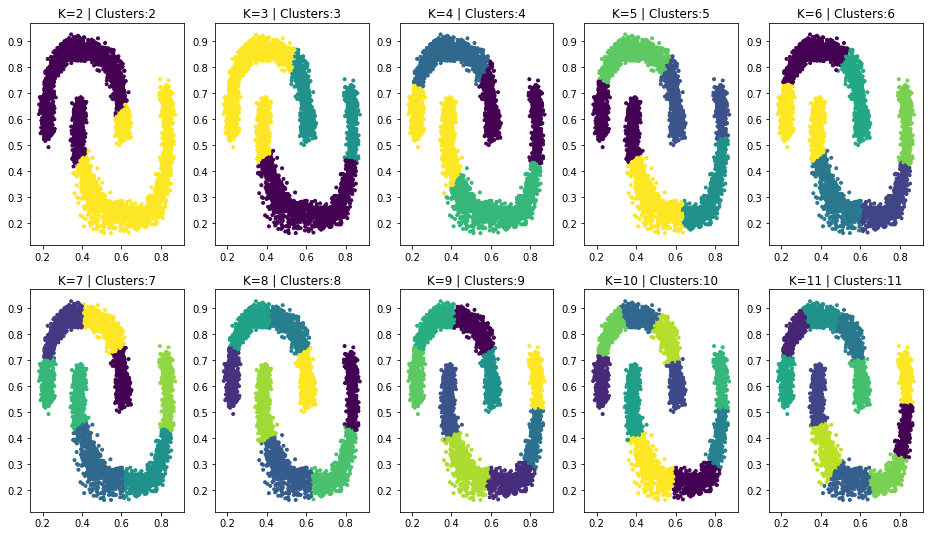

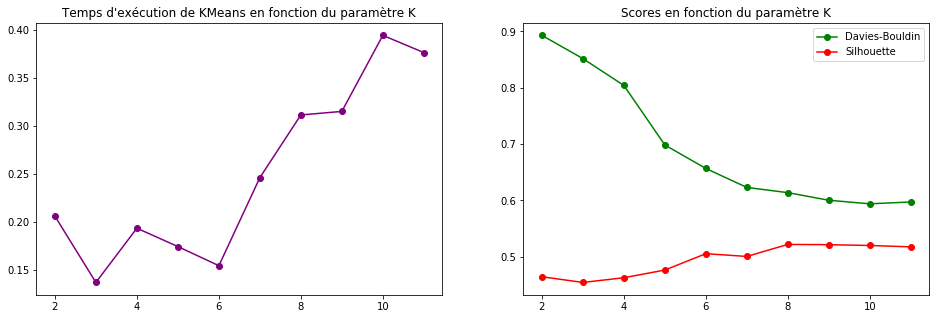

In [7]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,12)
sample = banana
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = KMeans(n_clusters=i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 5, j, "K", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("KMeans", "K", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**Avec Banana qui est non convexe, kmeans se plante complètement et n'aririve pas à correctement déouper les 2 clusters. On note également une première limite des métriques utilisées, elle ne sont pas adaptées aux clusters non convexes : ici performance indiquée semble plus ou moins proportionnelle à k, même si elle se stabilise après k=8.**

On va maintenant tester l'impact de la méthode d'initialisation sur les peformance de k-means

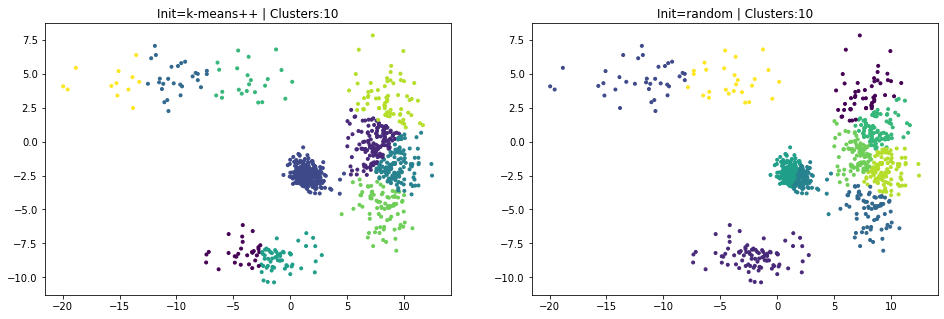

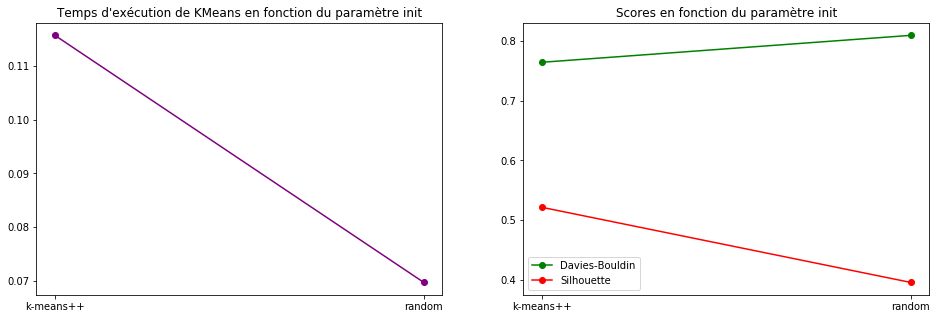

In [35]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = ["k-means++", "random"]
sample = elly
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,5))

for i in indexes:
    model = KMeans(n_clusters=10,init=i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 2, j, "Init", i)
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("KMeans", "init", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**La méthode d'initialisation n'a d'incidence que sur le temps d'exécution (plus rapide avec random). On note que quand K est mal réglé on n'obtient pas le même clustering à chaque exéution.**

## II - CLUSTERING AGGLOMERATIF

Essayons maintenant un clustering agglomératif

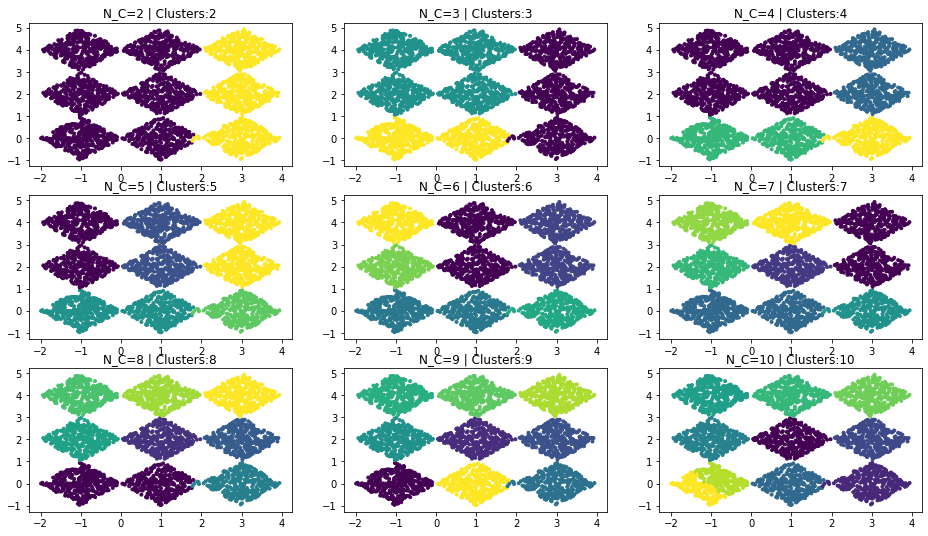

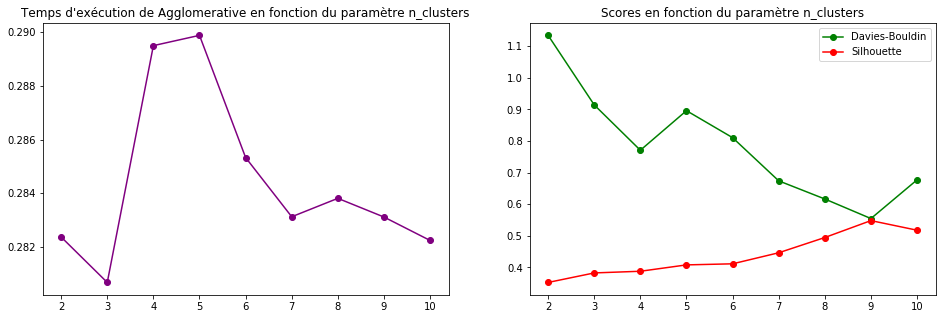

In [9]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,11)
sample = diamond
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = AgglomerativeClustering(n_clusters = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 3, 3, j, "N_C", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("Agglomerative", "n_clusters", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**On remarque que le clustering agglomératif s'en sort un peu moins bien que k-means sur diamond, il y a en effet un petit débordement de cluster pour k=9. En revanche, on voit que pour des k inférieurs, le clustering aglomératif découpe les clusters de manière plus rationnelle (en les regroupant entre eux) et ne les scinde pas en plein milieu comme k-means. Autre différence par rapport à k-means, ici le temps d'excécution diminue avac l'auhmentation de k.**

Effectuons un autre test sur elly cette fois :

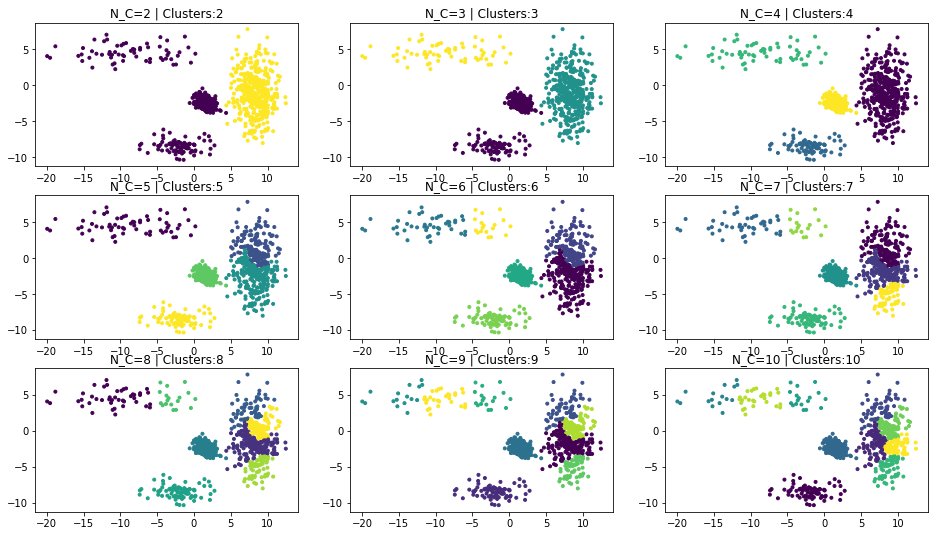

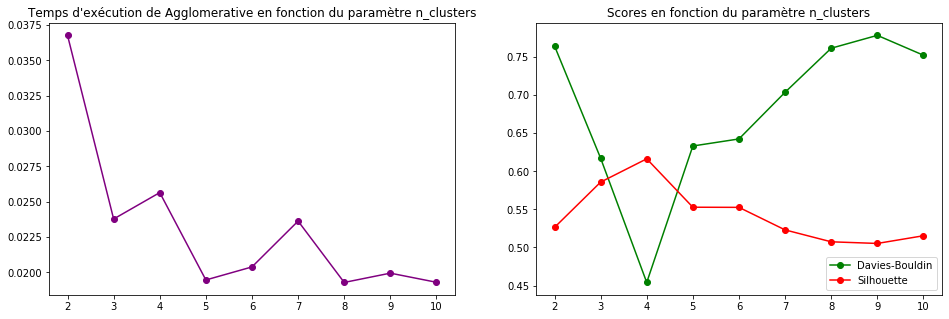

In [10]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,11)
sample = elly
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = AgglomerativeClustering(n_clusters = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 3, 3, j, "N_C", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("Agglomerative", "n_clusters", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**Il y a ici une nette mélioration par rapport à k-means et les données bruitées sont bien rattachées aux bons clusters (il reste un tout petit de débordement entre les 2 clusters de droite**

Nous allons maintenant tester l'influence du paramètre inkage sur le clustering proposé :

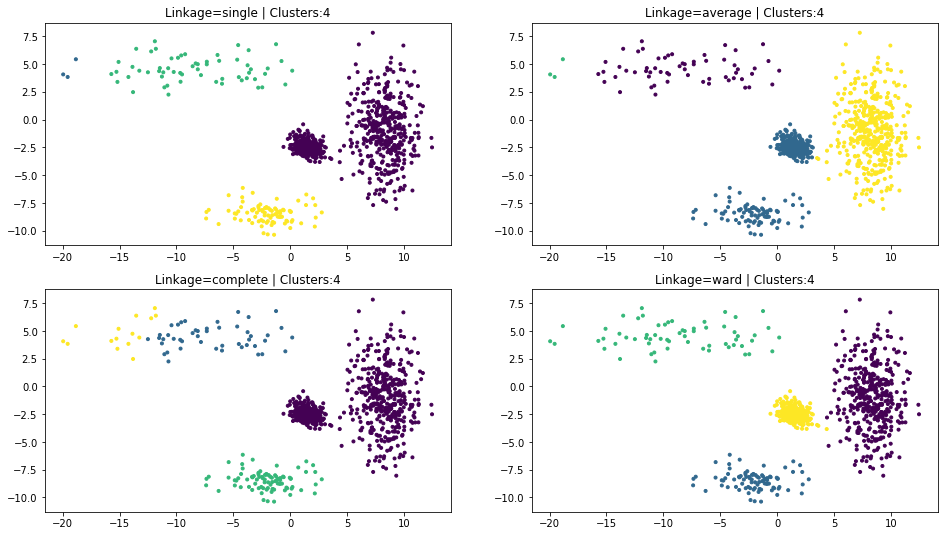

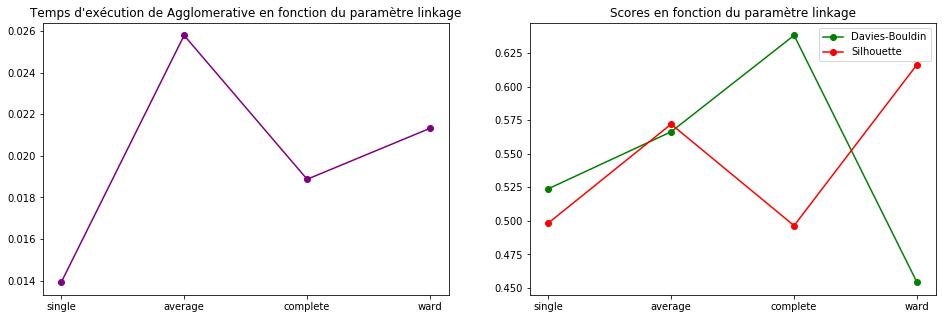

In [11]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = ["single", "average", "complete", "ward"]
sample = elly
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = AgglomerativeClustering(linkage = i, n_clusters = 4)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 2, j, "Linkage", i)
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("Agglomerative", "linkage", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**On remarque que ce paramètre est très important ici, pour résumer, c'est le mode ward qui s'en sort le mieux et de loin. Les autres modes ont tendance à regrouper plusieurs clusters ensemble ou a en scinder d'autres preant le bruit comme un cluster différent. Testons maintenant l'influence de ce paramètre sur des clusters non convexes :**

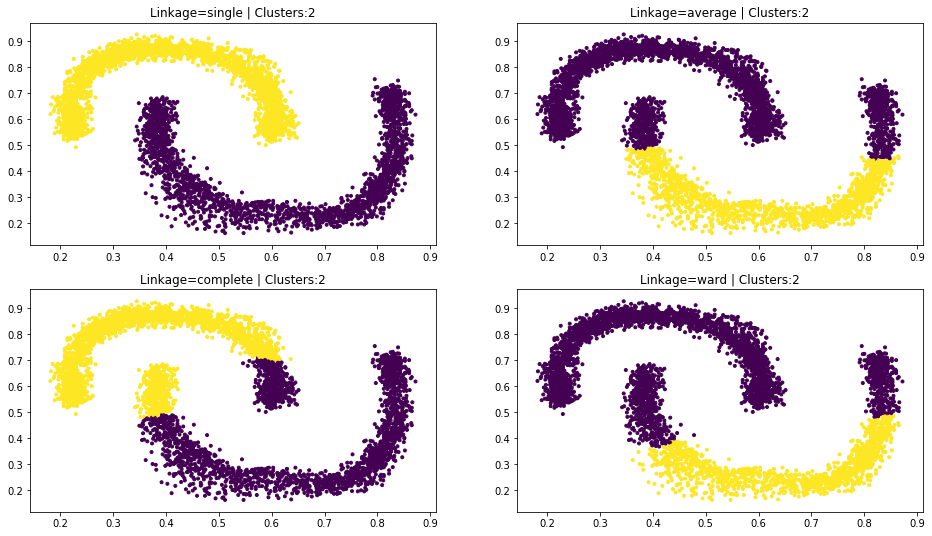

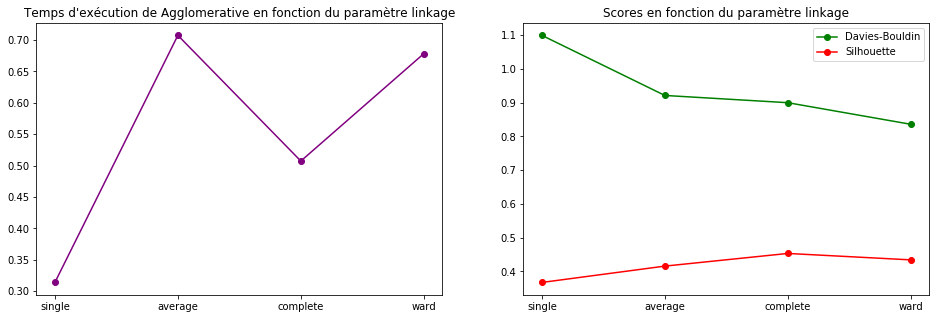

In [12]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = ["single", "average", "complete", "ward"]
sample = banana
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,9))

for i in indexes:
    model = AgglomerativeClustering(linkage = i, n_clusters = 2)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 2, j, "Linkage", i)
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("Agglomerative", "linkage", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**Fun fact : en mode de linkage "single" on obtient les bons clusters sur Banana qui est pourtant non convexe. Cependant les différentes métriques lui attribuent un mauvais score préférant encore ward qui est pourtant à côté de la plaque !**

Pour conclure, pour des clusters convexes, ward est largement meilleur que les autres. En revanche, dans le cas de clusters non convexes, c'est bien single qui s'en sort le mieux.

## III - DBSCAN

Passons maintenant à DBSCAN.

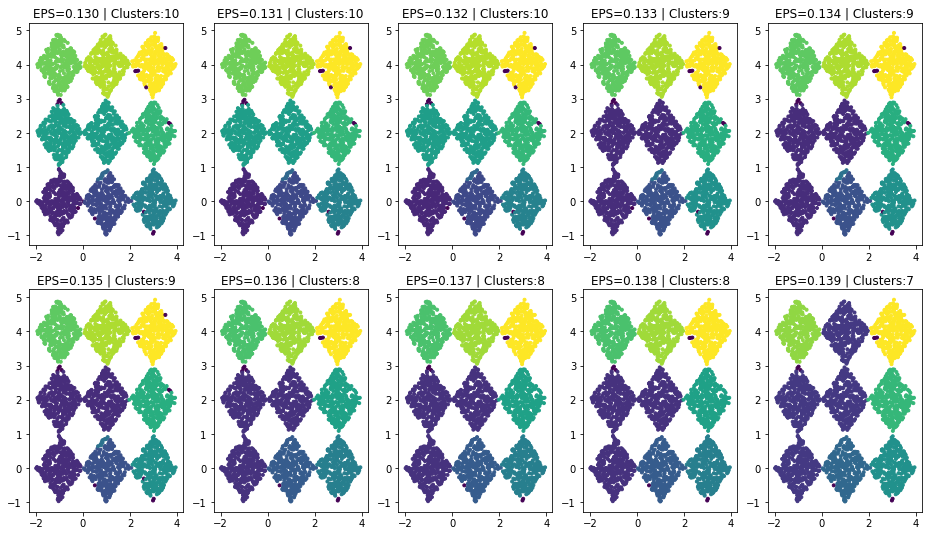

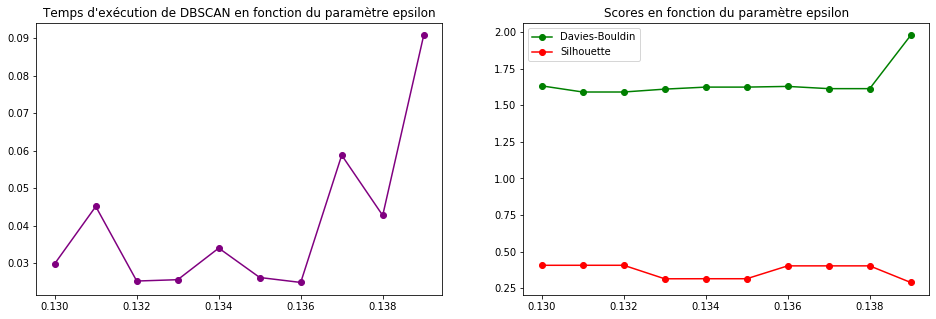

In [13]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = np.arange(0.13,0.139,0.001)
sample = diamond
j=1

data = create_train_set(sample)
  
plt.figure(figsize = (16,9))

for i in indexes:
    model = DBSCAN(eps = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 5, j, "EPS", f"{i:.3f}")
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("DBSCAN", "epsilon", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**On obtient le clustering le plus proche de la réalité pour eps=0.135, on note cependant que les performances de DBSCAN sont en deça des deux méthodes prédédentes sur diamond. Maintenant que nous avons fixé un epsilon, nous allons faire varier le paramètre min_samples et voir comment DBSCAN se comporte.**

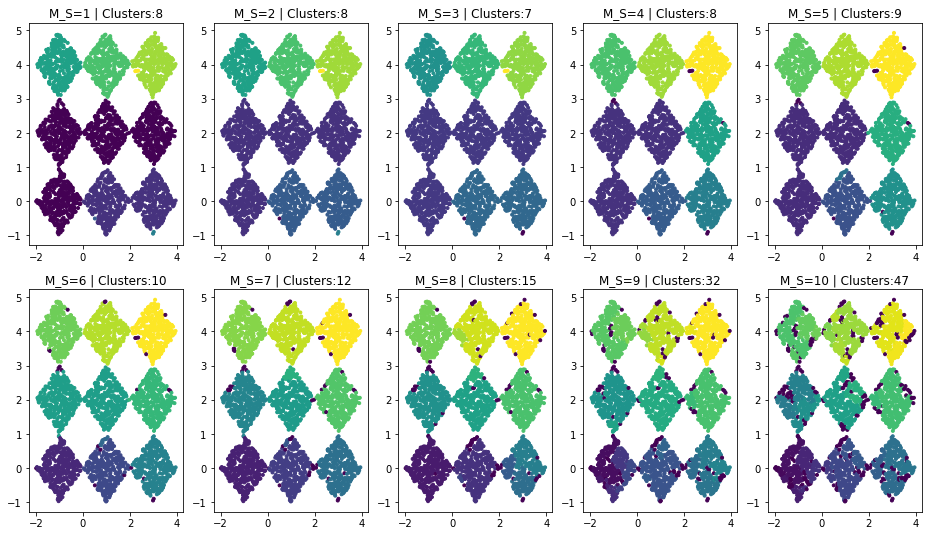

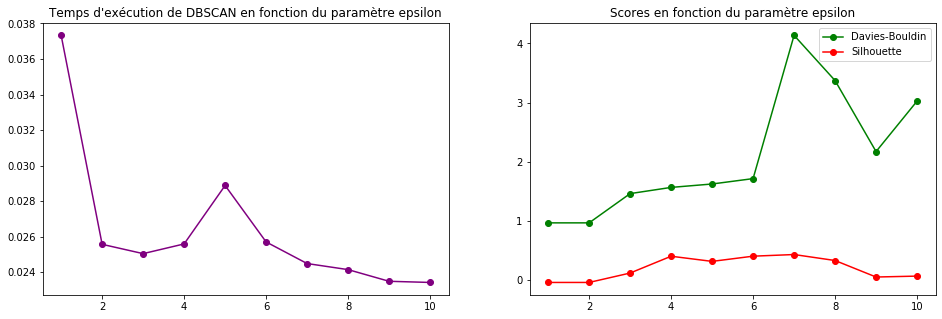

In [14]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(1,11)
sample = diamond
j = 1

data = create_train_set(sample)
    
plt.figure(figsize = (16,9))
    
for i in indexes:
    model = DBSCAN(eps = 0.135, min_samples = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 5, j, "M_S", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("DBSCAN", "epsilon", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**Le clustering le plus proche est obtenu pour min_samples=5 (qui est enfait la valeur par défaut de ce paramètre), choux blanc donc. Essayons plutôt avec un clustering plus délicat :**

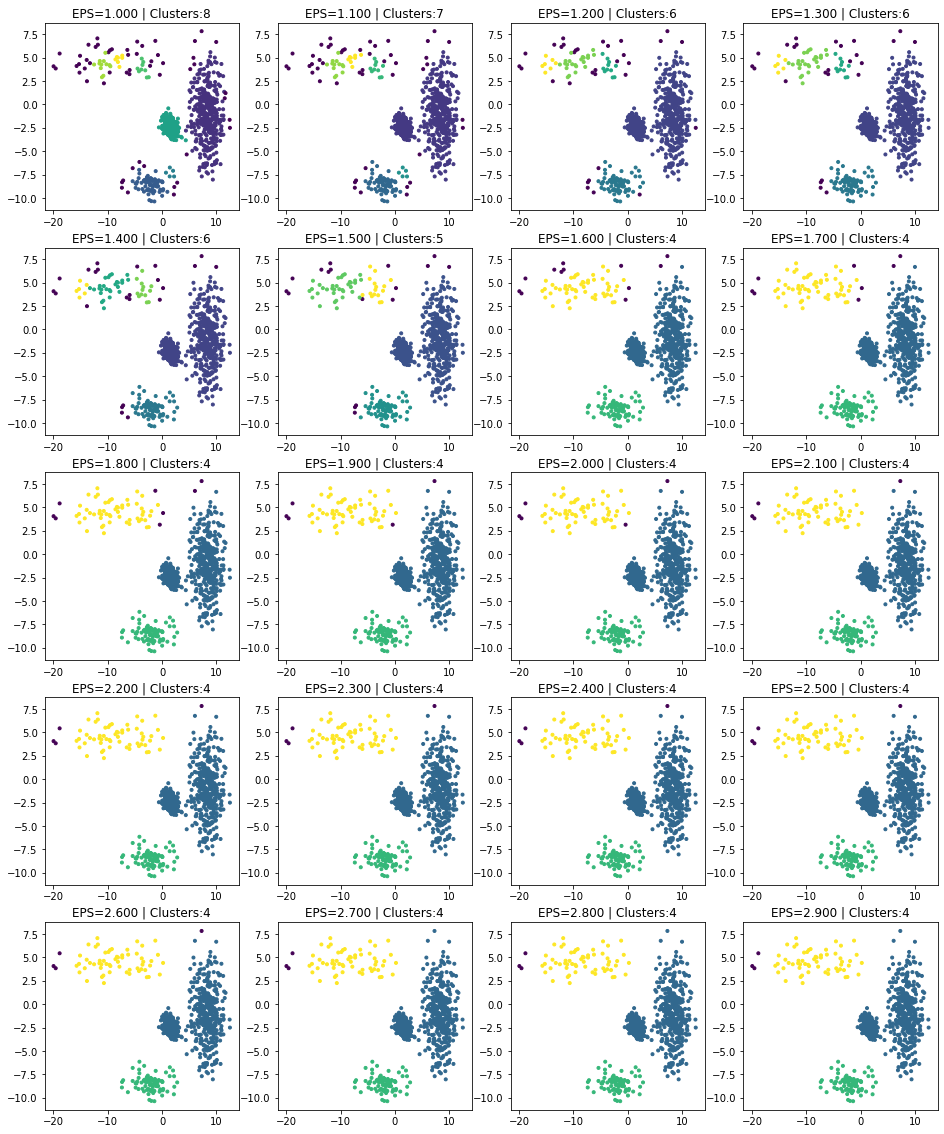

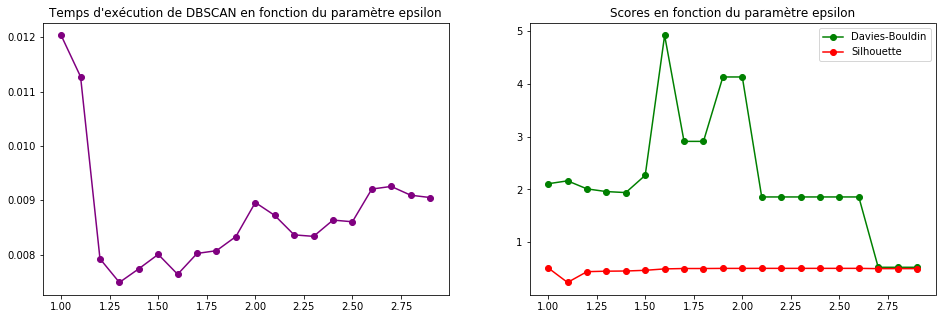

In [42]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = np.arange(1,3,0.1)
sample = elly
j=1

data = create_train_set(sample)
  
plt.figure(figsize = (16,20))

for i in indexes:
    model = DBSCAN(eps = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 5, 4, j, "EPS", f"{i:.3f}")
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("DBSCAN", "epsilon", indexes, times, scoresDB, scoresSilhouette, scoresCH)

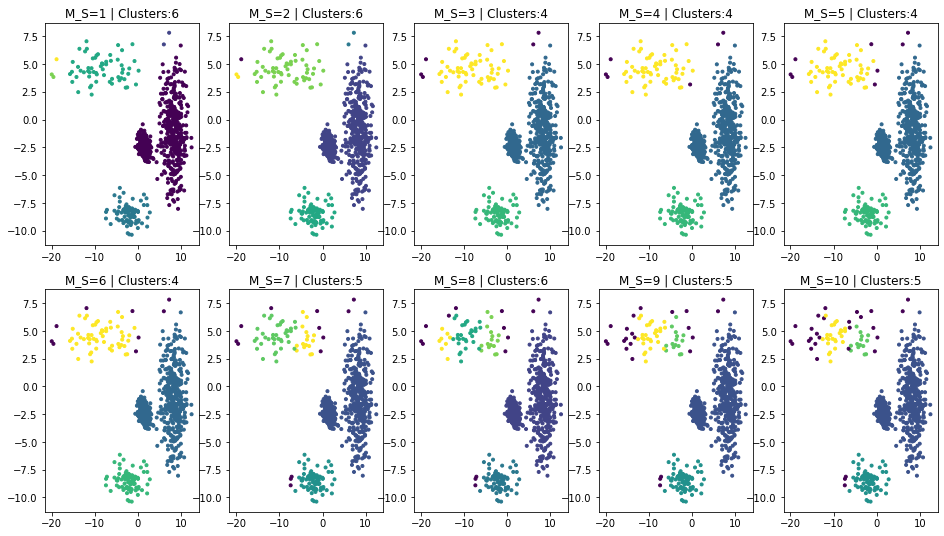

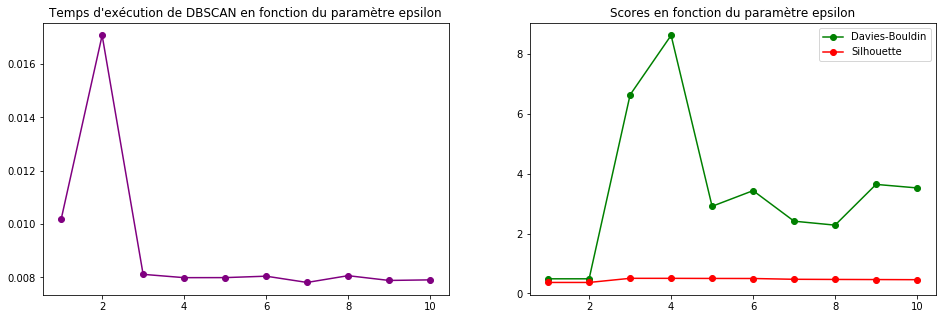

In [41]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(1,11)
sample = elly
j = 1

data = create_train_set(sample)
    
plt.figure(figsize = (16,9))
    
for i in indexes:
    model = DBSCAN(eps = 1.7, min_samples = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 5, j, "M_S", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("DBSCAN", "epsilon", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**On voit tout de suite que DBSCAN gère mal le bruit dans les données.**

Maintenant avec des clusters non convexes :

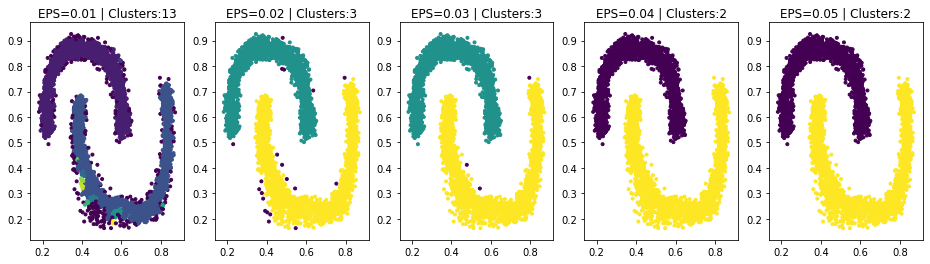

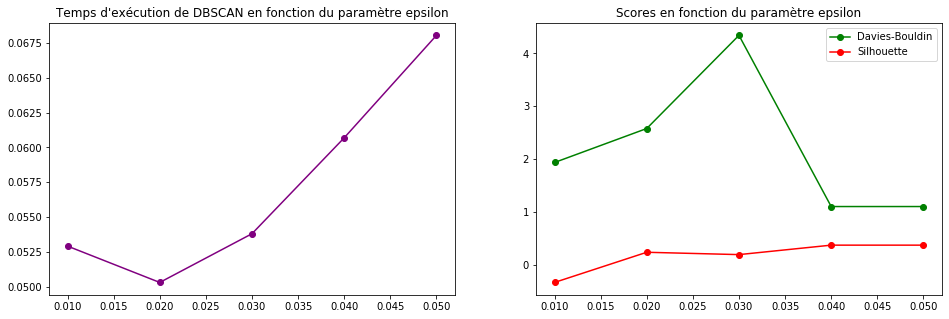

In [44]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = np.arange(0.01,0.06,0.01)
sample = banana
j = 1

data = create_train_set(sample)
  
plt.figure(figsize = (16,4))

for i in indexes:
    model = DBSCAN(eps = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 5, j, "EPS", f"{i:.2f}")
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("DBSCAN", "epsilon", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**Aucun souci, DBSCAN s'en sort très bien à condition de fixer correctement epsilon, les scores sont en accord avec le résultat.**

Pour conclure sur DBSCAN, s'il semble relativement bien adapté pour des clusters non convexes, il s'en sort moins biens que les autres algorithmes pour des clusters convexes. De plus, DBSCAN semble perturbé face au bruit et aux densités variables, bien davantage que les autres méthodes en fait.

## IV - HDBSCAN

Passons à notre dernière méthode, HDBSCAN. Commençons avec elly :

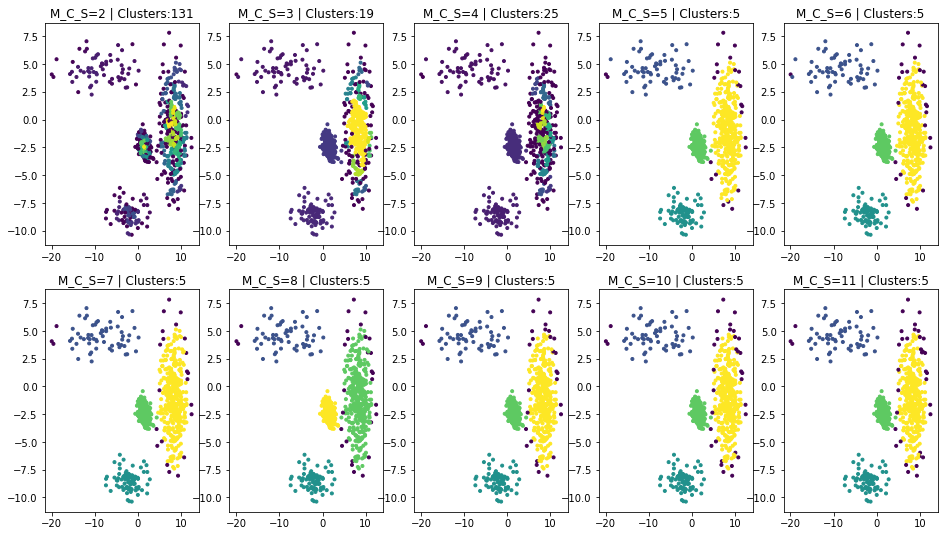

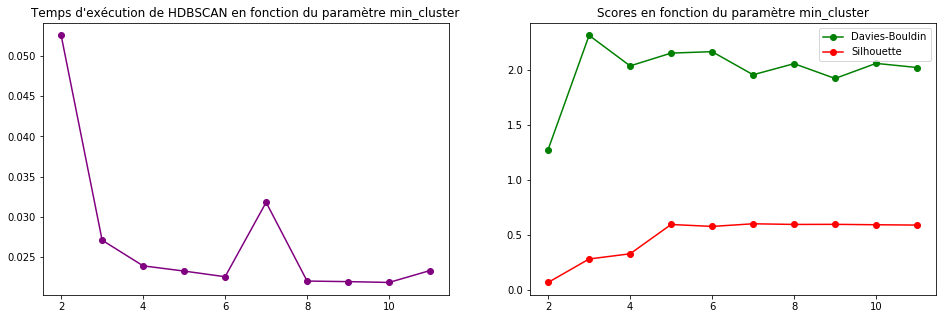

In [12]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,12)
sample = elly
j = 1

data = create_train_set(sample)
  
plt.figure(figsize = (16,9))

for i in indexes:
    model = HDBSCAN(min_cluster_size = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 2, 5, j, "M_C_S", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

print_metrics("HDBSCAN", "min_cluster", indexes, times, scoresDB, scoresSilhouette, scoresCH)

**Ici encore, tout comme avec DBSCAN, HDBSCAN s'en sort mal avec le bruit et les densités variables. On remarque que le paramètre min_clusters n'a plus aucune incidence à partir de 5.**

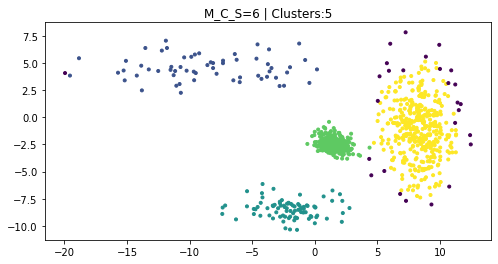

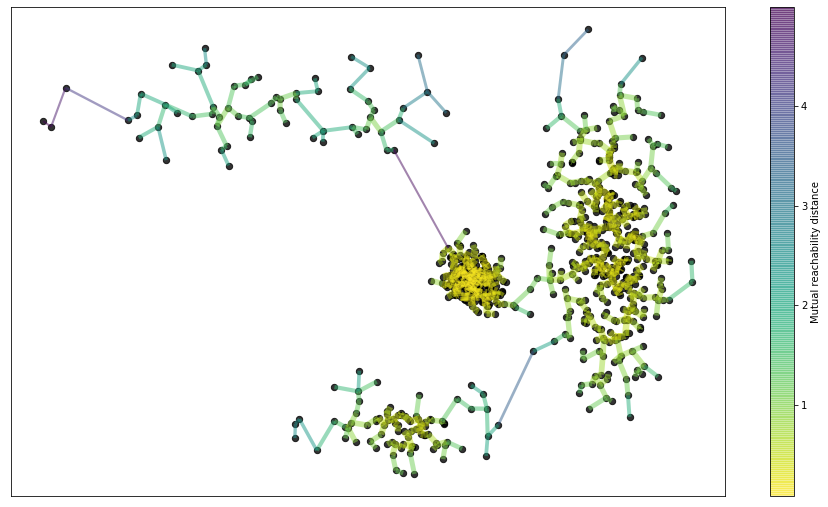

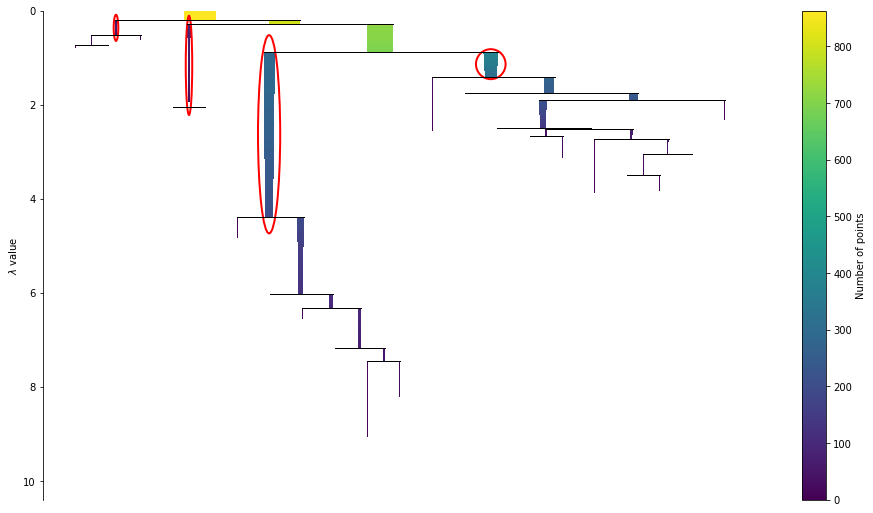

In [33]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
sample = elly

data = create_train_set(sample)
  
plt.figure(figsize = (8,4))


model = HDBSCAN(min_cluster_size = 6, gen_min_span_tree=True)
test_model(model, data, 1, 1, 1, "M_C_S", str(6)) 
plt.show()
plt.figure(figsize = (16,9))
model.minimum_spanning_tree_.plot()
plt.show()
plt.figure(figsize = (16,9))
model.condensed_tree_.plot(select_clusters=True, colorbar=True)

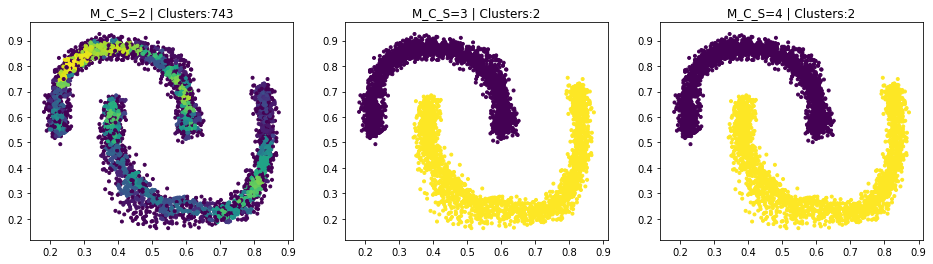

In [13]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = range(2,5)
sample = banana
j = 1

data = create_train_set(sample)
  
plt.figure(figsize = (16,4))

for i in indexes:
    model = HDBSCAN(min_cluster_size = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 3, j, "M_C_S", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

**Encore une fois, comme avec DBSCAN, HDBSCAN s'en sort sans aucun soucis sur ces clusters non convexes.**

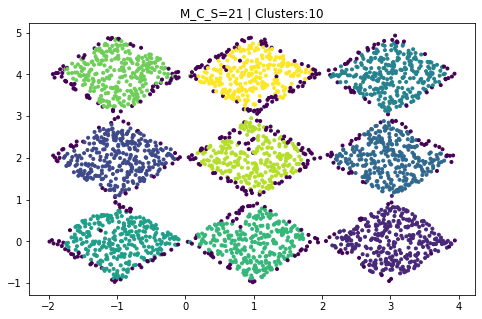

In [20]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = [21]
sample = diamond
j = 1

data = create_train_set(sample)
  
plt.figure(figsize = (8,5))

for i in indexes:
    model = HDBSCAN(min_cluster_size = i)
    t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data,1 , 1, j, "M_C_S", str(i))
    times.append(t)
    scoresDB.append(scoreDB)
    scoresSilhouette.append(scoreSilhouette)
    scoresCH.append(scoreCH)
    j = j+1
    
plt.show()

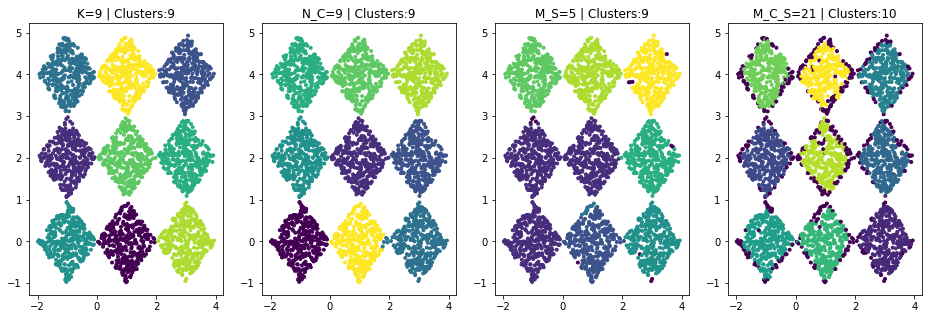

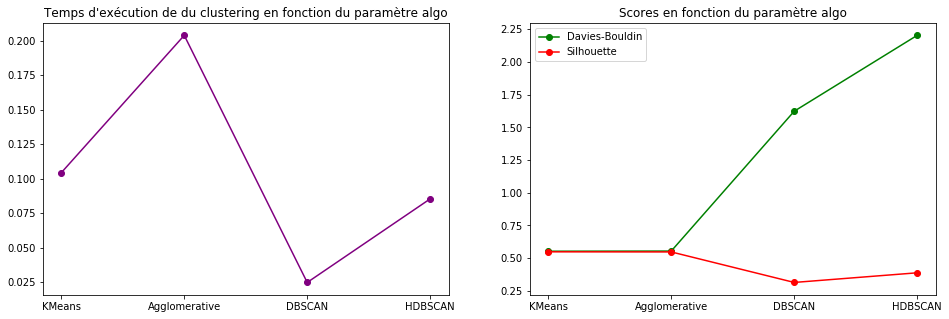

In [39]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = ["KMeans","Agglomerative","DBSCAN","HDBSCAN"]
sample = diamond
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,5))

model = KMeans(n_clusters=9)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 1, "K", str(9))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = AgglomerativeClustering(n_clusters = 9)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 2, "N_C", str(9))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = DBSCAN(eps = 0.135, min_samples = 5)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 3, "M_S", str(5))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = HDBSCAN(min_cluster_size = 21)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 4, "M_C_S", str(21))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)
    
plt.show()

print_metrics("du clustering", "algo", indexes, times, scoresDB, scoresSilhouette, scoresCH)

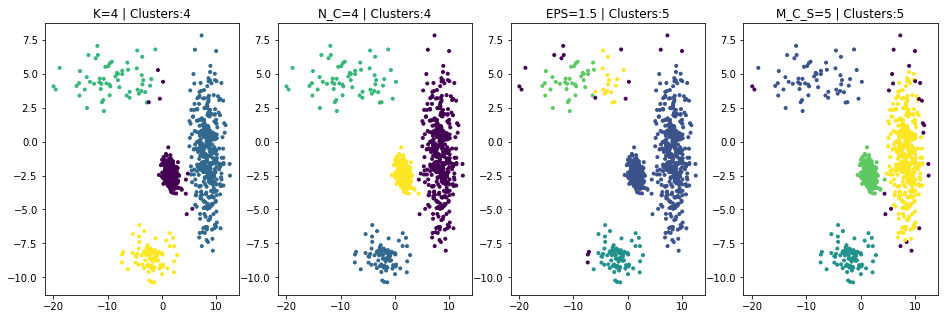

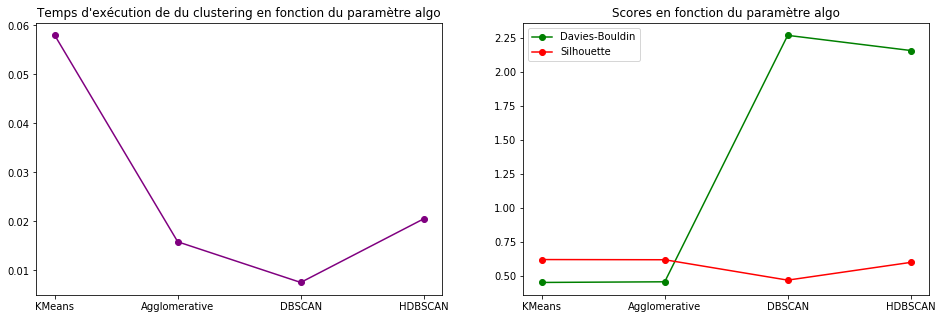

In [43]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = ["KMeans","Agglomerative","DBSCAN","HDBSCAN"]
sample = elly
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,5))

model = KMeans(n_clusters=4)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 1, "K", str(4))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = AgglomerativeClustering(n_clusters = 4)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 2, "N_C", str(4))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = DBSCAN(eps = 1.5, min_samples = 5)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 3, "EPS", str(1.5))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = HDBSCAN(min_cluster_size = 5)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 4, "M_C_S", str(5))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)
    
plt.show()

print_metrics("du clustering", "algo", indexes, times, scoresDB, scoresSilhouette, scoresCH)

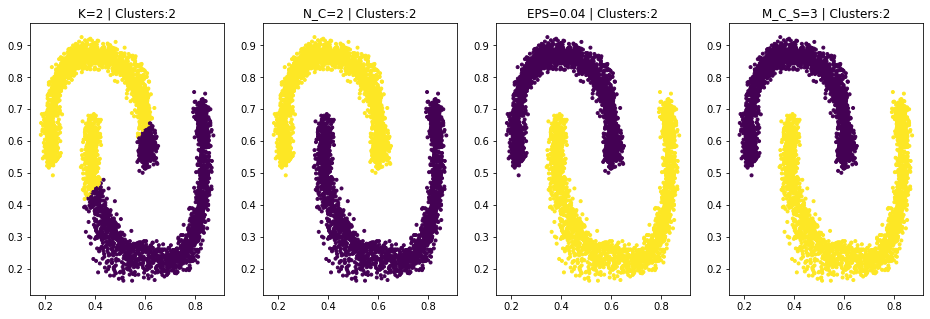

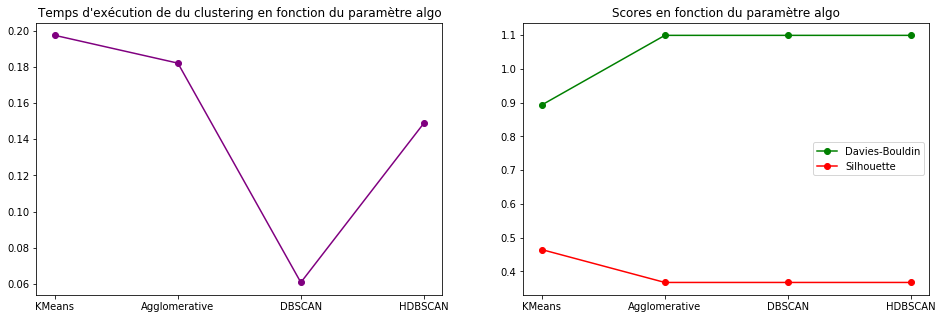

In [45]:
scoresSilhouette = []
scoresDB = []
scoresCH = []
times = []
indexes = ["KMeans","Agglomerative","DBSCAN","HDBSCAN"]
sample = banana
j = 1

data = create_train_set(sample)

plt.figure(figsize = (16,5))

model = KMeans(n_clusters=2)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 1, "K", str(2))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = AgglomerativeClustering(n_clusters = 2, linkage="single")
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 2, "N_C", str(2))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = DBSCAN(eps = 0.04, min_samples = 5)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 3, "EPS", str(0.04))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)

model = HDBSCAN(min_cluster_size = 3)
t, scoreDB, scoreCH, scoreSilhouette = test_model(model, data, 1, 4, 4, "M_C_S", str(3))
times.append(t)
scoresDB.append(scoreDB)
scoresSilhouette.append(scoreSilhouette)
scoresCH.append(scoreCH)
    
plt.show()

print_metrics("du clustering", "algo", indexes, times, scoresDB, scoresSilhouette, scoresCH)